In [8]:
import torch
from datasets.shapenet_data_pc import ShapeNet15kPointClouds
from datasets.pvd_data_pc import ShapeNet15kPointCloudsPVD
from metrics.evaluation_metrics import compute_all_metrics

In [9]:
chair_dataset = ShapeNet15kPointClouds(
    root_dir="./ShapeNetCore.v2.PC15k",
    categories=["chair"],
    split="val",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

airplane_dataset = ShapeNet15kPointClouds(
    root_dir="./ShapeNetCore.v2.PC15k",
    categories=["airplane"],
    split="val",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

pvd_airplane_dataset = ShapeNet15kPointCloudsPVD(
    root_dir="./custom-dataset",
    categories=["airplane"],
    split="train",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

pvd_chair_dataset = ShapeNet15kPointCloudsPVD(
    root_dir="./custom-dataset",
    categories=["chair"],
    split="train",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

Total number of data:662
Min number of points: (train)2048 (test)2048
Total number of data:405
Min number of points: (train)2048 (test)2048
Total number of data:400
Min number of points: (train)2048 (test)2048
Total number of data:400
Min number of points: (train)2048 (test)2048


In [10]:
BATCH_SIZE = 50

shapenet_dataloader_airplane = torch.utils.data.DataLoader(
    airplane_dataset,
    batch_size=BATCH_SIZE,
    sampler=None,
    shuffle=True is None,
    num_workers=1,
    drop_last=True,
)

shapenet_dataloader_chair = torch.utils.data.DataLoader(
    chair_dataset,
    batch_size=BATCH_SIZE,
    sampler=None,
    shuffle=True is None,
    num_workers=1,
    drop_last=True,
)

pvd_dataloader_airplane = torch.utils.data.DataLoader(
    pvd_airplane_dataset,
    batch_size=BATCH_SIZE,
    sampler=None,
    shuffle=True is None,
    num_workers=1,
    drop_last=True,
)

pvd_dataloader_chair = torch.utils.data.DataLoader(
    pvd_chair_dataset,
    batch_size=BATCH_SIZE,
    sampler=None,
    shuffle=True is None,
    num_workers=1,
    drop_last=True,
)

In [11]:
shapenet_input_arr = []
pvd_output_arr = []

for batch_shapenet, batch_pvd in zip(shapenet_dataloader_airplane, pvd_dataloader_airplane):
    shapenet_input = batch_shapenet["test_points"].to("cuda")
    pvd_output = batch_pvd["test_points"].to("cuda")

    shapenet_input_arr.append(shapenet_input)
    pvd_output_arr.append(pvd_output)

In [13]:
input_airplane_pcs = torch.stack(shapenet_input_arr).view(400, 2048, 3)
output_airplane_pcs = torch.stack(pvd_output_arr).view(400, 2048, 3)
input_airplane_pcs.shape, output_airplane_pcs.shape

(torch.Size([400, 2048, 3]), torch.Size([400, 2048, 3]))

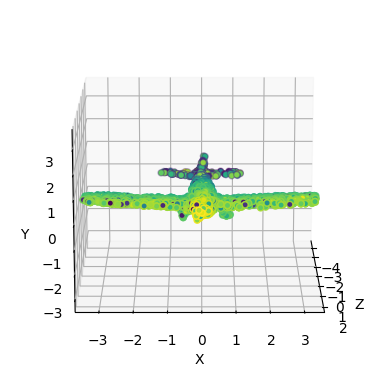

In [14]:
from visuals.visuals_util import visualize_pointcloud
fig = visualize_pointcloud(output_airplane_pcs[0, ...])

In [15]:
torch.save(output_airplane_pcs, "./eval-results/airplanes_pvd_output.pth")

In [7]:
results = compute_all_metrics(input_airplane_pcs, output_airplane_pcs, 50)
results = {k: (v.cpu().detach().item()
                if not isinstance(v, float) else v) for k, v in results.items()}

print(results)

100%|██████████| 400/400 [24:14<00:00,  3.61s/it]

{'lgan_mmd-CD': 0.06428211182355881, 'lgan_cov-CD': 0.3474999964237213, 'lgan_mmd_smp-CD': 0.01850527711212635, 'lgan_mmd-EMD': 0.3960535526275635, 'lgan_cov-EMD': 0.35499998927116394, 'lgan_mmd_smp-EMD': 0.10759074985980988, '1-NN-CD-acc_t': 0.5149999856948853, '1-NN-CD-acc_f': 0.9449999928474426, '1-NN-CD-acc': 0.7300000190734863, '1-NN-EMD-acc_t': 0.22499999403953552, '1-NN-EMD-acc_f': 0.012500000186264515, '1-NN-EMD-acc': 0.11874999850988388}


In [ ]:
torch.save(results, "airplane_5k_eval.pth")

In [ ]:
airplane = {
    "lgan_mmd-CD": 0.06689093261957169,
    "lgan_cov-CD": 0.3400000035762787,
    "lgan_mmd_smp-CD": 0.020403025671839714,
    "lgan_mmd-EMD": 0.5590656995773315,
    "lgan_cov-EMD": 0.3725000023841858,
    "lgan_mmd_smp-EMD": 0.29166239500045776,
    "1-NN-CD-acc_t": 0.6175000071525574,
    "1-NN-CD-acc_f": 0.8924999833106995,
    "1-NN-CD-acc": 0.7549999952316284,
    "1-NN-EMD-acc_t": 0.5774999856948853,
    "1-NN-EMD-acc_f": 0.7925000190734863,
    "1-NN-EMD-acc": 0.6850000023841858,
}
# 1-NNA-CD: 75.49%
# 1-NNA-EMD: 68.5%

In [16]:
shapenet_input_arr = []
pvd_output_arr = []

for batch_shapenet, batch_pvd in zip(shapenet_dataloader_chair, pvd_dataloader_chair):
    shapenet_input = batch_shapenet["test_points"].to("cuda")
    pvd_output = batch_pvd["test_points"].to("cuda")

    shapenet_input_arr.append(shapenet_input)
    pvd_output_arr.append(pvd_output)

In [17]:
input_chair_pcs = torch.stack(shapenet_input_arr).view(400, 2048, 3)
output_chair_pcs = torch.stack(pvd_output_arr).view(400, 2048, 3)
input_chair_pcs.shape, output_chair_pcs.shape

(torch.Size([400, 2048, 3]), torch.Size([400, 2048, 3]))

In [18]:
torch.save(output_chair_pcs, "./eval-results/chairs_pvd_output.pth")

In [13]:
results = compute_all_metrics(input_chair_pcs, output_chair_pcs, 100)
results = {k: (v.cpu().detach().item()
                if not isinstance(v, float) else v) for k, v in results.items()}

print(results)

100%|██████████| 400/400 [07:43<00:00,  1.08s/it]

{'lgan_mmd-CD': 0.09327861666679382, 'lgan_cov-CD': 0.5174999833106995, 'lgan_mmd_smp-CD': 0.10668836534023285, 'lgan_mmd-EMD': 0.5605520009994507, 'lgan_cov-EMD': 0.5400000214576721, 'lgan_mmd_smp-EMD': 0.6099603176116943, '1-NN-CD-acc_t': 0.6200000047683716, '1-NN-CD-acc_f': 0.5475000143051147, '1-NN-CD-acc': 0.5837500095367432, '1-NN-EMD-acc_t': 0.5525000095367432, '1-NN-EMD-acc_f': 0.5674999952316284, '1-NN-EMD-acc': 0.5600000023841858}


In [ ]:
chair = {
    "lgan_mmd-CD": 0.09327861666679382,
    "lgan_cov-CD": 0.5174999833106995,
    "lgan_mmd_smp-CD": 0.10668836534023285,
    "lgan_mmd-EMD": 0.5605520009994507,
    "lgan_cov-EMD": 0.5400000214576721,
    "lgan_mmd_smp-EMD": 0.6099603176116943,
    "1-NN-CD-acc_t": 0.6200000047683716,
    "1-NN-CD-acc_f": 0.5475000143051147,
    "1-NN-CD-acc": 0.5837500095367432,
    "1-NN-EMD-acc_t": 0.5525000095367432,
    "1-NN-EMD-acc_f": 0.5674999952316284,
    "1-NN-EMD-acc": 0.5600000023841858,
}
# 1-NNA-CD: 58.37%
# 1-NNA-EMD: 56.0%

# Evaluate PointTransformer

In [5]:
point_transfomer_input_pcs = torch.load("./eval-results/point-transformer/2024-01-30_23-46-44_global_refinment/input_pcs.pt").to("cuda")[:400, ...]
point_transfomer_output_pcs = torch.load("./eval-results/point-transformer/2024-01-30_23-46-44_global_refinment/output_pcs.pt").to("cuda")

point_transfomer_input_pcs.shape, point_transfomer_output_pcs.shape

(torch.Size([400, 2048, 3]), torch.Size([400, 2048, 3]))

In [6]:
results = compute_all_metrics(point_transfomer_input_pcs, point_transfomer_output_pcs, 100)
results = {k: (v.cpu().detach().item()
                if not isinstance(v, float) else v) for k, v in results.items()}

print(results)

100%|██████████| 400/400 [07:59<00:00,  1.19s/it]

{'lgan_mmd-CD': 0.07491616904735565, 'lgan_cov-CD': 0.30250000953674316, 'lgan_mmd_smp-CD': 0.026528310030698776, 'lgan_mmd-EMD': 0.6154521107673645, 'lgan_cov-EMD': 0.32249999046325684, 'lgan_mmd_smp-EMD': 0.3293913006782532, '1-NN-CD-acc_t': 0.8949999809265137, '1-NN-CD-acc_f': 0.9700000286102295, '1-NN-CD-acc': 0.9325000047683716, '1-NN-EMD-acc_t': 0.7149999737739563, '1-NN-EMD-acc_f': 0.8849999904632568, '1-NN-EMD-acc': 0.800000011920929}


In [ ]:
result = {
    "lgan_mmd-CD": 0.07491616904735565,
    "lgan_cov-CD": 0.30250000953674316,
    "lgan_mmd_smp-CD": 0.026528310030698776,
    "lgan_mmd-EMD": 0.6154521107673645,
    "lgan_cov-EMD": 0.32249999046325684,
    "lgan_mmd_smp-EMD": 0.3293913006782532,
    "1-NN-CD-acc_t": 0.8949999809265137,
    "1-NN-CD-acc_f": 0.9700000286102295,
    "1-NN-CD-acc": 0.9325000047683716,
    "1-NN-EMD-acc_t": 0.7149999737739563,
    "1-NN-EMD-acc_f": 0.8849999904632568,
    "1-NN-EMD-acc": 0.800000,
}

# 1-NNA-CD 93.25%
# 1-NNA-EMD 80%

In [3]:
point_transfomer_input_pcs = torch.load("./eval-results/point-transformer/2024-02-02_19-09-12_global_refinment/input_pcs.pt").to("cuda")[:400, ...]
point_transfomer_output_pcs = torch.load("./eval-results/point-transformer/2024-02-02_19-09-12_global_refinment/output_pcs.pt").to("cuda")

point_transfomer_input_pcs.shape, point_transfomer_output_pcs.shape

(torch.Size([400, 2048, 3]), torch.Size([400, 2048, 3]))

In [4]:
results = compute_all_metrics(point_transfomer_input_pcs, point_transfomer_output_pcs, 100)
results = {k: (v.cpu().detach().item()
                if not isinstance(v, float) else v) for k, v in results.items()}

print(results)

100%|██████████| 400/400 [07:53<00:00,  1.18s/it]

{'lgan_mmd-CD': 0.06674178689718246, 'lgan_cov-CD': 0.3425000011920929, 'lgan_mmd_smp-CD': 0.020022423937916756, 'lgan_mmd-EMD': 0.5565726161003113, 'lgan_cov-EMD': 0.3774999976158142, 'lgan_mmd_smp-EMD': 0.29521191120147705, '1-NN-CD-acc_t': 0.6850000023841858, '1-NN-CD-acc_f': 0.8575000166893005, '1-NN-CD-acc': 0.7712500095367432, '1-NN-EMD-acc_t': 0.6324999928474426, '1-NN-EMD-acc_f': 0.762499988079071, '1-NN-EMD-acc': 0.6974999904632568}


In [5]:
torch.save({"results": results} , "point_transformer_results.pth")

In [ ]:
result = {
    "lgan_mmd-CD": 0.06674178689718246,
    "lgan_cov-CD": 0.3425000011920929,
    "lgan_mmd_smp-CD": 0.020022423937916756,
    "lgan_mmd-EMD": 0.5565726161003113,
    "lgan_cov-EMD": 0.3774999976158142,
    "lgan_mmd_smp-EMD": 0.29521191120147705,
    "1-NN-CD-acc_t": 0.6850000023841858,
    "1-NN-CD-acc_f": 0.8575000166893005,
    "1-NN-CD-acc": 0.7712500095367432,
    "1-NN-EMD-acc_t": 0.6324999928474426,
    "1-NN-EMD-acc_f": 0.762499988079071,
    "1-NN-EMD-acc": 0.6974999904632568,
}
# 1-NNA-CD 77.12%
# 1-NNA-EMD 69.74%

In [11]:
for input in pvd_dataloader_airplane:
    point_clouds = input["train_points"]
    break

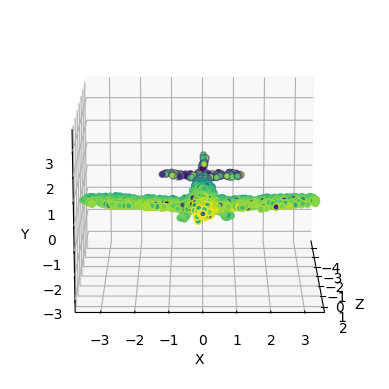

In [14]:
from visuals.visuals_util import visualize_pointcloud
fig = visualize_pointcloud(point_clouds[0, ...])

In [1]:
import torch

noise = torch.normal(0, 1, size=(2048, 3))

In [18]:
from visuals.mitsuba_vis import render_mitsuba

input_img = render_mitsuba(point_clouds[0, ...].cpu().numpy(), "./coarse-shape.xml", fov=15, radius=0.01)

Center: [0.08699501 0.22332683 1.1807005 ], Scale: 7.039486885070801


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


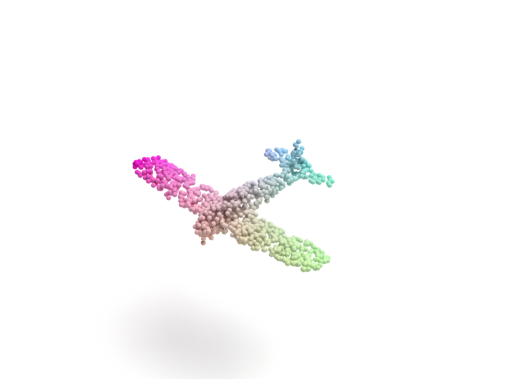

In [19]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(input_img ** (1.0 / 2.2)) # approximate sRGB tonemapping
plt.savefig("Noise.png", bbox_inches='tight', pad_inches=0, dpi=400)